# FIG 1

## Load data

### Since the noon and sunset periods were interpolated into 1,000 grid points, the data required for the line chart is very large. Therefore, the line chart data is provided directly here, including the mean values (*_mean,npy) as well as the upper (*_high,npy) and lower (*_low,npy) bounds of the 95% confidence interval. Among them, turban*.npy indicates the precipitation occured only in cities with different precipitation intervals (0.2-0.5, 0.5-1, and greater than 1), and urban*.npy (rural*.npy) indicates the precipitation occured in urban (rural) areas.

In [2]:
import numpy as np

turban_02_05 = np.load(fr"turban_02_05_mean.npy")
turban_05_1 = np.load(fr"turban_05_1_mean.npy")
turban_1 = np.load(fr"turban_1_mean.npy")

turban_02_05_low = np.load(fr"turban_02_05_low.npy")
turban_05_1_low = np.load(fr"turban_05_1_low.npy")
turban_1_low = np.load(fr"turban_1_low.npy")

turban_02_05_high = np.load(fr"turban_02_05_high.npy")
turban_05_1_high = np.load(fr"turban_05_1_high.npy")
turban_1_high = np.load(fr"turban_1_high.npy")

urban_02_05_mean = np.load(fr"urban_02_05_mean.npy")
urban_05_1_mean = np.load(fr"urban_05_1_mean.npy")
urban_1_mean = np.load(fr"urban_1_mean.npy")
rural_02_05_mean = np.load(fr"rural_02_05_mean.npy")
rural_05_1_mean = np.load(fr"rural_05_1_mean.npy")
rural_1_mean = np.load(fr"rural_1_mean.npy")

urban_02_05_low = np.load(fr"urban_02_05_low.npy")
urban_05_1_low = np.load(fr"urban_05_1_low.npy")
urban_1_low = np.load(fr"urban_1_low.npy")
rural_02_05_low = np.load(fr"rural_02_05_low.npy")
rural_05_1_low = np.load(fr"rural_05_1_low.npy")
rural_1_low = np.load(fr"rural_1_low.npy")

urban_02_05_high = np.load(fr"urban_02_05_high.npy")
urban_05_1_high = np.load(fr"urban_05_1_high.npy")
urban_1_high = np.load(fr"urban_1_high.npy")
rural_02_05_high = np.load(fr"rural_02_05_high.npy")
rural_05_1_high = np.load(fr"rural_05_1_high.npy")
rural_1_high = np.load(fr"rural_1_high.npy")

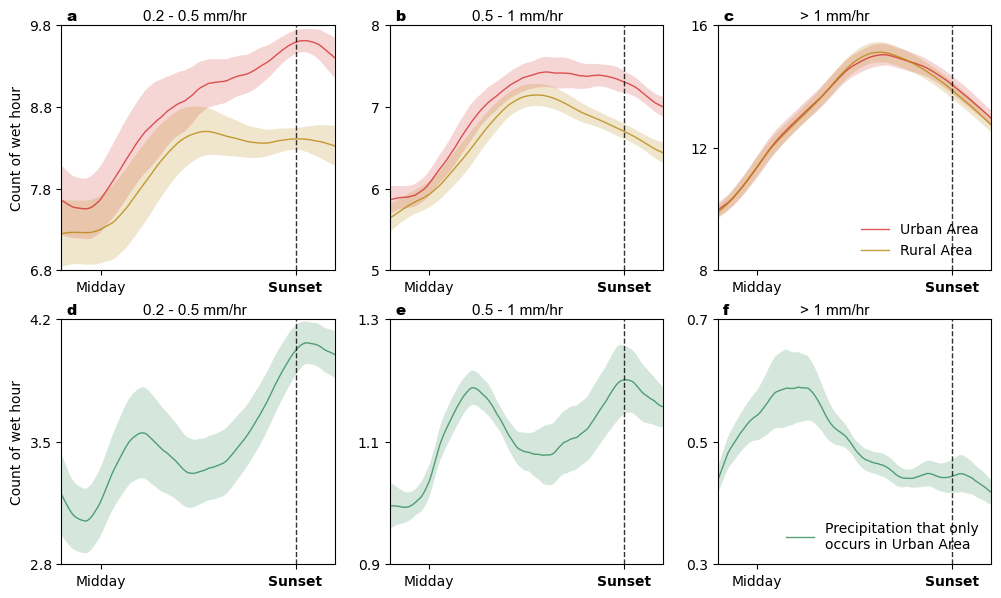

In [3]:
import matplotlib.pyplot as plt

def data_to_fig1(ax, data, low, high):
    """
    Plot single time series with shaded uncertainty range for urban-only precipitation events.
    """
    color = '#2E8B57'  # Dark green
    ax.plot(range(1000), data, color=color, alpha=0.8, linewidth=1,
            label="Precipitation that only\noccurs in Urban Area")
    ax.axvline(856, color="k", linestyle="--", linewidth=1, alpha=0.8)  # Sunset marker
    ax.fill_between(range(1000), low, high, color=color, alpha=0.2, ec="none")

    # X-axis ticks: midday and sunset
    ax.set_xticks([143, 856])
    ax.set_xticklabels(["Midday", "Sunset"])
    _style_xticklabels(ax)

    return ax


def data_to_fig2(ax, data_u, data_r, low_u, high_u, low_r, high_r):
    """
    Plot two time series (Urban vs Rural) with shaded uncertainty ranges.
    """
    color_u = '#D32F2F'  # Red for urban
    color_r = '#B8860B'  # Dark goldenrod for rural
    ax.plot(range(1000), data_u, color=color_u, alpha=0.8, linewidth=1, label="Urban Area")
    ax.plot(range(1000), data_r, color=color_r, alpha=0.8, linewidth=1, label="Rural Area")
    ax.fill_between(range(1000), low_u, high_u, color=color_u, alpha=0.2, ec="none")
    ax.fill_between(range(1000), low_r, high_r, color=color_r, alpha=0.2, ec="none")

    # Vertical line for sunset
    ax.axvline(856, color="k", linestyle="--", linewidth=1, alpha=0.8)

    # X-axis ticks
    ax.set_xticks([143, 856])
    ax.set_xticklabels(["Midday", "Sunset"])
    _style_xticklabels(ax)

    return ax


def _style_xticklabels(ax):
    """
    Helper: Style x-tick labels so 'Sunset' is bold.
    """
    labels = ax.get_xticklabels()
    labels[0].set_color('black')
    labels[1].set_color('black')
    labels[0].set_fontweight('normal')
    labels[1].set_fontweight('bold')


def _set_axis_format(ax, y_ticks, y_lim):
    """
    Helper: Set y-axis ticks, limits, and x-axis limits for all subplots.
    """
    ax.set_yticks(y_ticks, y_ticks)
    ax.set_ylim(y_lim)
    ax.set_xlim(0, 1000)


# ======= Main figure setup =======
fig, axs = plt.subplots(2, 3, figsize=(12, 7))

# First row: urban vs rural comparison
data_to_fig2(axs[0, 0], urban_02_05_mean, rural_02_05_mean,
             urban_02_05_low, urban_02_05_high, rural_02_05_low, rural_02_05_high)
data_to_fig2(axs[0, 1], urban_05_1_mean, rural_05_1_mean,
             urban_05_1_low, urban_05_1_high, rural_05_1_low, rural_05_1_high)
data_to_fig2(axs[0, 2], urban_1_mean, rural_1_mean,
             urban_1_low, urban_1_high, rural_1_low, rural_1_high)

# Second row: urban-only events
data_to_fig1(axs[1, 0], turban_02_05, turban_02_05_low, turban_02_05_high)
data_to_fig1(axs[1, 1], turban_05_1, turban_05_1_low, turban_05_1_high)
data_to_fig1(axs[1, 2], turban_1, turban_1_low, turban_1_high)

# ===== Axis formatting =====
_set_axis_format(axs[0, 0], [6.8, 7.8, 8.8, 9.8], (6.8, 9.8))
_set_axis_format(axs[0, 1], [5, 6, 7, 8], (5, 8))
_set_axis_format(axs[0, 2], [8, 12, 16], (8, 16))
_set_axis_format(axs[1, 0], [2.8, 3.5, 4.2], (2.8, 4.2))
_set_axis_format(axs[1, 1], [0.9, 1.1, 1.3], (0.9, 1.3))
_set_axis_format(axs[1, 2], [0.3, 0.5, 0.7], (0.3, 0.7))

# Y-axis labels
axs[0, 0].set_ylabel("Count of wet hour")
axs[1, 0].set_ylabel("Count of wet hour")

# Legends
axs[0, 2].legend(frameon=False, loc="lower right")
axs[1, 2].legend(frameon=False, loc="lower right")

# ===== Titles and labels =====
dict_title_cfg = dict(fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")
labels = list("abcdef")
for ax, label in zip(axs.flat, labels):
    ax.text(0.02, 1.02, label, transform=ax.transAxes, **dict_title_cfg)

# Rainfall intensity labels
intensity_labels = ["0.2 - 0.5 mm/hr", "0.5 - 1 mm/hr", "> 1 mm/hr"]
for row in range(2):
    for col, txt in enumerate(intensity_labels):
        axs[row, col].text(0.3, 1.02, txt, transform=axs[row, col].transAxes,
                           fontsize=11, ha="left", fontfamily="Arial")

plt.show()


## Fig S4 (Sptial pattern)

### 
The file spa_{year}.txt contains the latitude, longitude, and urban-rural precipitation difference index (DI) at sunset for the extracted cities in each year.

Column 1: Latitude

Column 2: Longitude

Column 3: DI (calculated as (urban − rural) / rural)

Note: The urban units were extracted using the same method as in previous studies, and since the extraction was performed annually, the number of cities varies from year to year.

Alternative (more concise version):
The spa_{year}.txt file includes the latitude, longitude, and urban-rural precipitation difference index (DI = (urban − rural) / rural) at sunset for the extracted cities each year (Columns 1-3: latitude, longitude, DI).

Note: Urban units were extracted annually using the same method as in prior studies, so the number of cities differs across years.

### 

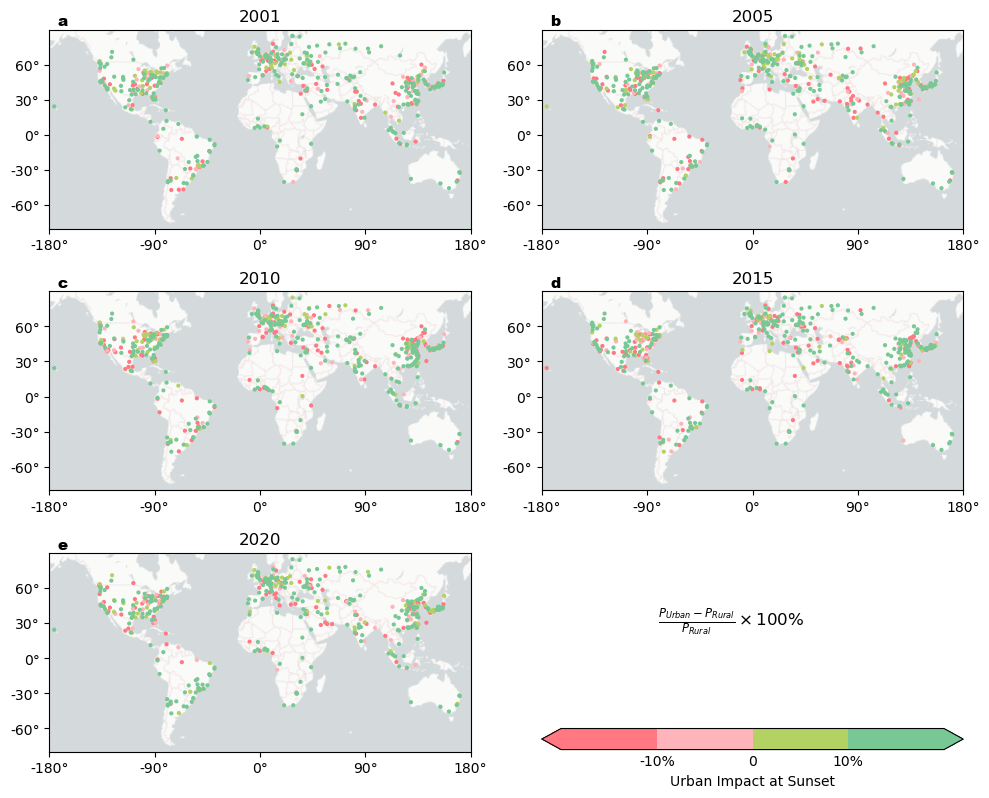

In [7]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.colors import ListedColormap

# ===== Color definitions =====
COLORS = [
    (255/255, 120/255, 130/255),  # Strong negative
    (255/255, 179/255, 186/255),  # Weak negative
    (180/255, 210/255, 100/255),  # Weak positive
    (120/255, 200/255, 150/255)   # Strong positive
]
THRESHOLDS = [-0.1, 0, 0.1]  # Value cutoffs for color mapping


def classify_colors(values):
    """Assign colors based on predefined thresholds."""
    return [
        COLORS[0] if v < THRESHOLDS[0] else
        COLORS[1] if v < THRESHOLDS[1] else
        COLORS[2] if v < THRESHOLDS[2] else
        COLORS[3]
        for v in values
    ]


def plot_spatial(ax, loc):
    """Plot spatial data points with category colors on a basemap."""
    loc = loc[loc[:, 2].argsort()]
    gdf = gpd.GeoDataFrame(
        pd.DataFrame(loc, columns=["lat", "lon", "value"]),
        geometry=gpd.points_from_xy(loc[:, 1], loc[:, 0]),
        crs="EPSG:4326"
    ).to_crs(epsg=3857)

    gdf.plot(ax=ax, markersize=4, c=classify_colors(loc[:, 2]))
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.PositronNoLabels, attribution="")

    # Configure ticks and limits
    ax.set_xlim(-18000000, 18000000)
    ax.set_ylim(-8000000, 9000000)
    ax.set_xticks([-18000000, -9000000, 0, 9000000, 18000000], ['-180°', '-90°', '0°', '90°', '180°'])
    ax.set_yticks([-6000000, -3000000, 0, 3000000, 6000000], ['-60°', '-30°', '0°', '30°', '60°'])
    ax.tick_params(bottom=True, left=True, labelbottom=True, labelleft=True)
    return ax


def add_colorbar(ax):
    """Add horizontal colorbar with annotation."""
    sm = plt.cm.ScalarMappable(cmap=ListedColormap(COLORS), norm=plt.Normalize(vmin=0, vmax=100))
    sm.set_array([])
    cbar = ax.figure.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.15, pad=0.1, extend='both')
    cbar.set_label("Urban Impact at Sunset")
    cbar.set_ticks([0, 25, 50, 75, 100])
    cbar.set_ticklabels(["", "-10%", "0", "10%", ""])
    cbar.ax.tick_params(length=0)
    cbar.ax.set_position([0.57, 0.18, 0.3, 0.05])
    ax.set_axis_off()
    ax.text(0.45, 0.53, r'$\frac{P_{Urban} - P_{Rural}}{P_{Rural}} \times 100\%$',
            transform=ax.transAxes, fontsize=12, ha='center', va='center', color='black')
    return cbar


# ===== Main plotting =====
years = [2001, 2005, 2010, 2015, 2020]
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Plot all years
for ax, year in zip(axs.flat, years):
    plot_spatial(ax, np.loadtxt(f"spa_{year}.txt"))
    ax.set_title(str(year))

# Subplot labels a–e
for ax, label in zip(axs.flat, list("abcde")):
    ax.text(0.02, 1.02, label, transform=ax.transAxes, fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")

# Colorbar in last subplot
add_colorbar(axs[2, 1])

plt.tight_layout()
plt.show()


c:\Users\32952\anaconda3\envs\py12\Lib\site-packages\geopandas\plotting.py:308: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  collection = ax.scatter(x, y, cmap=cmap, **kwargs)
c:\Users\32952\anaconda3\envs\py12\Lib\site-packages\geopandas\plotting.py:308: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  collection = ax.scatter(x, y, cmap=cmap, **kwargs)
c:\Users\32952\anaconda3\envs\py12\Lib\site-packages\geopandas\plotting.py:308: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  collection = ax.scatter(x, y, cmap=cmap, **kwargs)
c:\Users\32952\anaconda3\envs\py12\Lib\site-packages\geopandas\plotting.py:308: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  collection = ax.scatter(x, y, cmap=cmap, **kwargs)
c:\Users\32952\anaconda3\envs\py12\Lib\site-packages\geopandas\plotting.py:308: UserWarning: No data for col

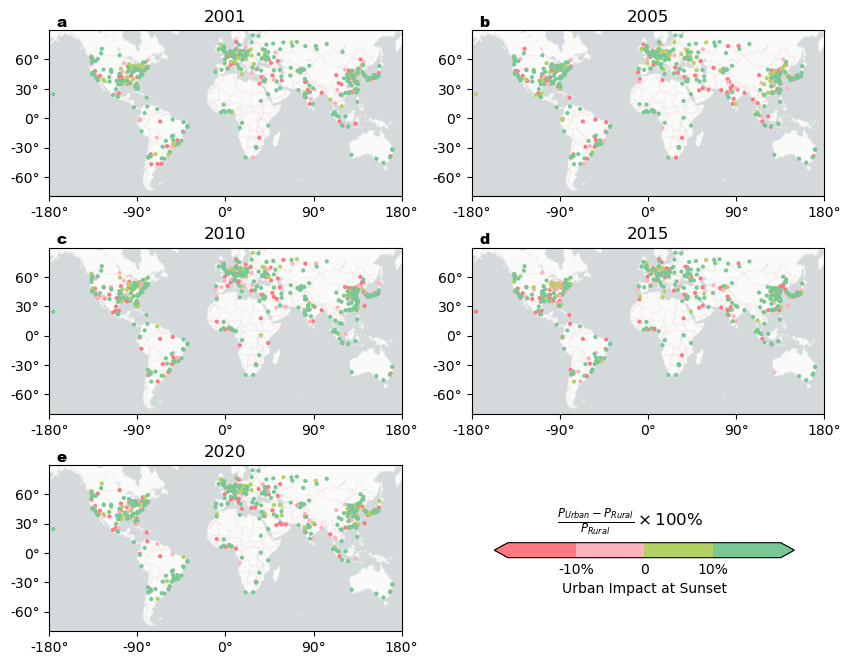

In [6]:
from matplotlib.colors import ListedColormap
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

b3 = (255/255, 120/255, 130/255) 
b4 =  (255/255, 179/255, 186/255)  
b5 = (180/255, 210/255, 100/255)  
b6 = (120/255, 200/255, 150/255)
def show_colorbar(ax, colors):
    """
    Function to display a custom colorbar on a given axes object (ax).
    
    Parameters:
    ax: The axes to which the colorbar will be added.
    colors: A list of colors to create the custom colormap.
    """
    # Create the custom colormap
    cmap_custom = ListedColormap(colors)
    
    # Create a ScalarMappable object for the colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap_custom, norm=plt.Normalize(vmin=0, vmax=100))
    sm.set_array([])  # Empty array for colorbar
    
    # Create the colorbar
    cbar = ax.figure.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.15, pad=0.1, extend='both')
    
    # Customize the colorbar
    cbar.set_label("Urban Impact at Sunset")
    cbar.set_ticks([0, 25, 50, 75, 100])
    cbar.set_ticklabels(["", "-10%", "0", "10%", ""])
    cbar.ax.tick_params(length=0)
    
    cbar.ax.set_position([0.57, 0.18, 0.3, 0.05])
    ax.set_axis_off()
    ax.text(0.45, 0.53,  r'$\frac{P_{Urban} - P_{Rural}}{P_{Rural}} \times 100\%$', 
            transform=ax.transAxes, fontsize=12, ha='center', va='center', color='black')
    # Adjust layout to move colorbar up and make it larger
    # plt.subplots_adjust(top=0.55)  # Increase this value to move the colorbar further up
    
    return cbar


def spatial_show_category_new(ax,loc):
    loc = loc[loc[:, 2].argsort()]
    from matplotlib.colors import ListedColormap
    c_list = []
    for i in range(len(loc[:,2])):
        if loc[i,2]<-0.1:
            c_list.append(b3)
        elif loc[i,2]<0:
            c_list.append(b4)
        elif loc[i,2]<0.1:
            c_list.append(b5)
        else:
            c_list.append(b6)
    df_loc = pd.DataFrame(loc, columns=["lat", "lon","color"])
    gdf_loc = gpd.GeoDataFrame(
        df_loc,
        geometry=gpd.points_from_xy(df_loc.lon, df_loc.lat),
        crs="EPSG:4326"
    ).to_crs(epsg=3857)
    gdf_loc.plot(
        ax=ax,
        markersize=4,
        c=c_list,
        norm=plt.Normalize(vmin=0, vmax=1), 
        label = "Studied City",
        )
    ctx.add_basemap(
        ax=ax,
        attribution="",
        source=ctx.providers.CartoDB.PositronNoLabels,
    )
    ax.tick_params(
        axis='both',         
        which='both',        
        bottom=True,         
        left=True,           
        labelbottom=True,    
        labelleft=True       
    )
    ax.autoscale(axis='x')
    w, s, e, n = -18000000, -8000000, 18000000, 9000000  
    ax.set_xlim(w, e)
    ax.set_ylim(s, n)
    # Add custom latitude and longitude ticks
    ax.set_xticks([-18000000, -9000000, 0, 9000000, 18000000],['-180\u00b0', '-90\u00b0', '0\u00b0', '90\u00b0', '180\u00b0'])
    ax.set_yticks([-6000000,-3000000, 0, 3000000, 6000000] ,[ '-60\u00b0','-30\u00b0', '0\u00b0', '30\u00b0', '60\u00b0'])
    return ax

fig, axs = plt.subplots(3,2,figsize=(10, 8))
axs[0,0] = spatial_show_category_new(axs[0,0],np.loadtxt(fr"spa_2001.txt"))
axs[0,1] = spatial_show_category_new(axs[0,1],np.loadtxt(fr"spa_2005.txt"))
axs[1,0] = spatial_show_category_new(axs[1,0],np.loadtxt(fr"spa_2010.txt"))
axs[1,1] = spatial_show_category_new(axs[1,1],np.loadtxt(fr"spa_2015.txt"))
axs[2,0] = spatial_show_category_new(axs[2,0],np.loadtxt(fr"spa_2020.txt"))

axs[0,0].set_title("2001")
axs[0,1].set_title("2005")
axs[1,0].set_title("2010")
axs[1,1].set_title("2015")
axs[2,0].set_title("2020")
dict_title_cfg = dict(fontsize=11, fontweight="heavy", ha="left", fontfamily="Arial")
axs[0,0].text(0.02, 1.02, "a", **dict_title_cfg, transform=axs[0,0].transAxes)
axs[0,1].text(0.02, 1.02,"b", **dict_title_cfg, transform=axs[0,1].transAxes)
axs[1,0].text(0.02, 1.02, "c", **dict_title_cfg, transform=axs[1,0].transAxes)
axs[1,1].text(0.02, 1.02, "d", **dict_title_cfg, transform=axs[1,1].transAxes)
axs[2,0].text(0.02, 1.02,"e", **dict_title_cfg, transform=axs[2,0].transAxes)

axs[2,1] = show_colorbar(axs[2,1], [b3,b4,b5,b6])
